In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

data = pd.read_csv('optical+recognition+of+handwritten+digits/optdigits.tra', header=None)

print(data.head())

   0   1   2   3   4   5   6   7   8   9   ...  55  56  57  58  59  60  61  \
0   0   1   6  15  12   1   0   0   0   7  ...   0   0   0   6  14   7   1   
1   0   0  10  16   6   0   0   0   0   7  ...   0   0   0  10  16  15   3   
2   0   0   8  15  16  13   0   0   0   1  ...   0   0   0   9  14   0   0   
3   0   0   0   3  11  16   0   0   0   0  ...   0   0   0   0   1  15   2   
4   0   0   5  14   4   0   0   0   0   0  ...   0   0   0   4  12  14   7   

   62  63  64  
0   0   0   0  
1   0   0   0  
2   0   0   7  
3   0   0   4  
4   0   0   6  

[5 rows x 65 columns]


In [2]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize an SVM classifier
classifier = svm.SVC(gamma=0.001, kernel='rbf')

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the test set
predicted = classifier.predict(X_test)

# Evaluate the model
print("Classification report:\n")
print(classification_report(y_test, predicted))

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.95      0.99      0.97       116
           2       1.00      1.00      1.00       122
           3       0.99      0.98      0.98       125
           4       0.99      1.00      0.99        96
           5       0.98      1.00      0.99       118
           6       0.99      0.99      0.99       123
           7       0.99      0.97      0.98       129
           8       1.00      0.97      0.99       103
           9       0.99      0.98      0.99       109

    accuracy                           0.99      1147
   macro avg       0.99      0.99      0.99      1147
weighted avg       0.99      0.99      0.99      1147



Confusion Matrix:


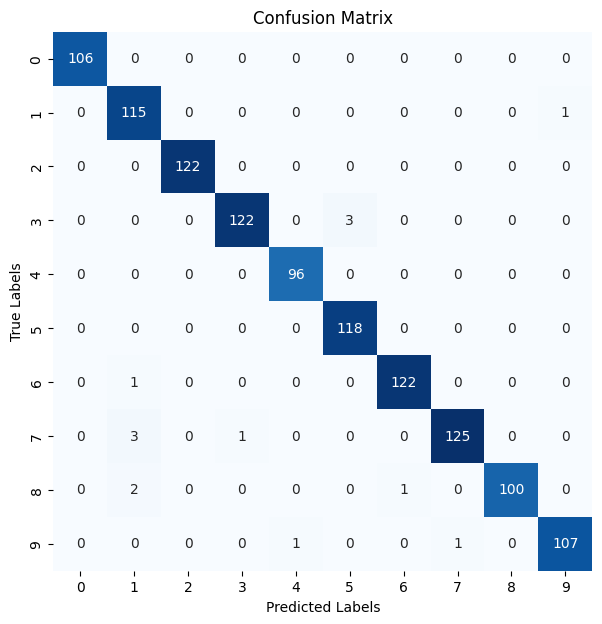

In [3]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted)

# Display the confusion matrix
print("Confusion Matrix:")
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

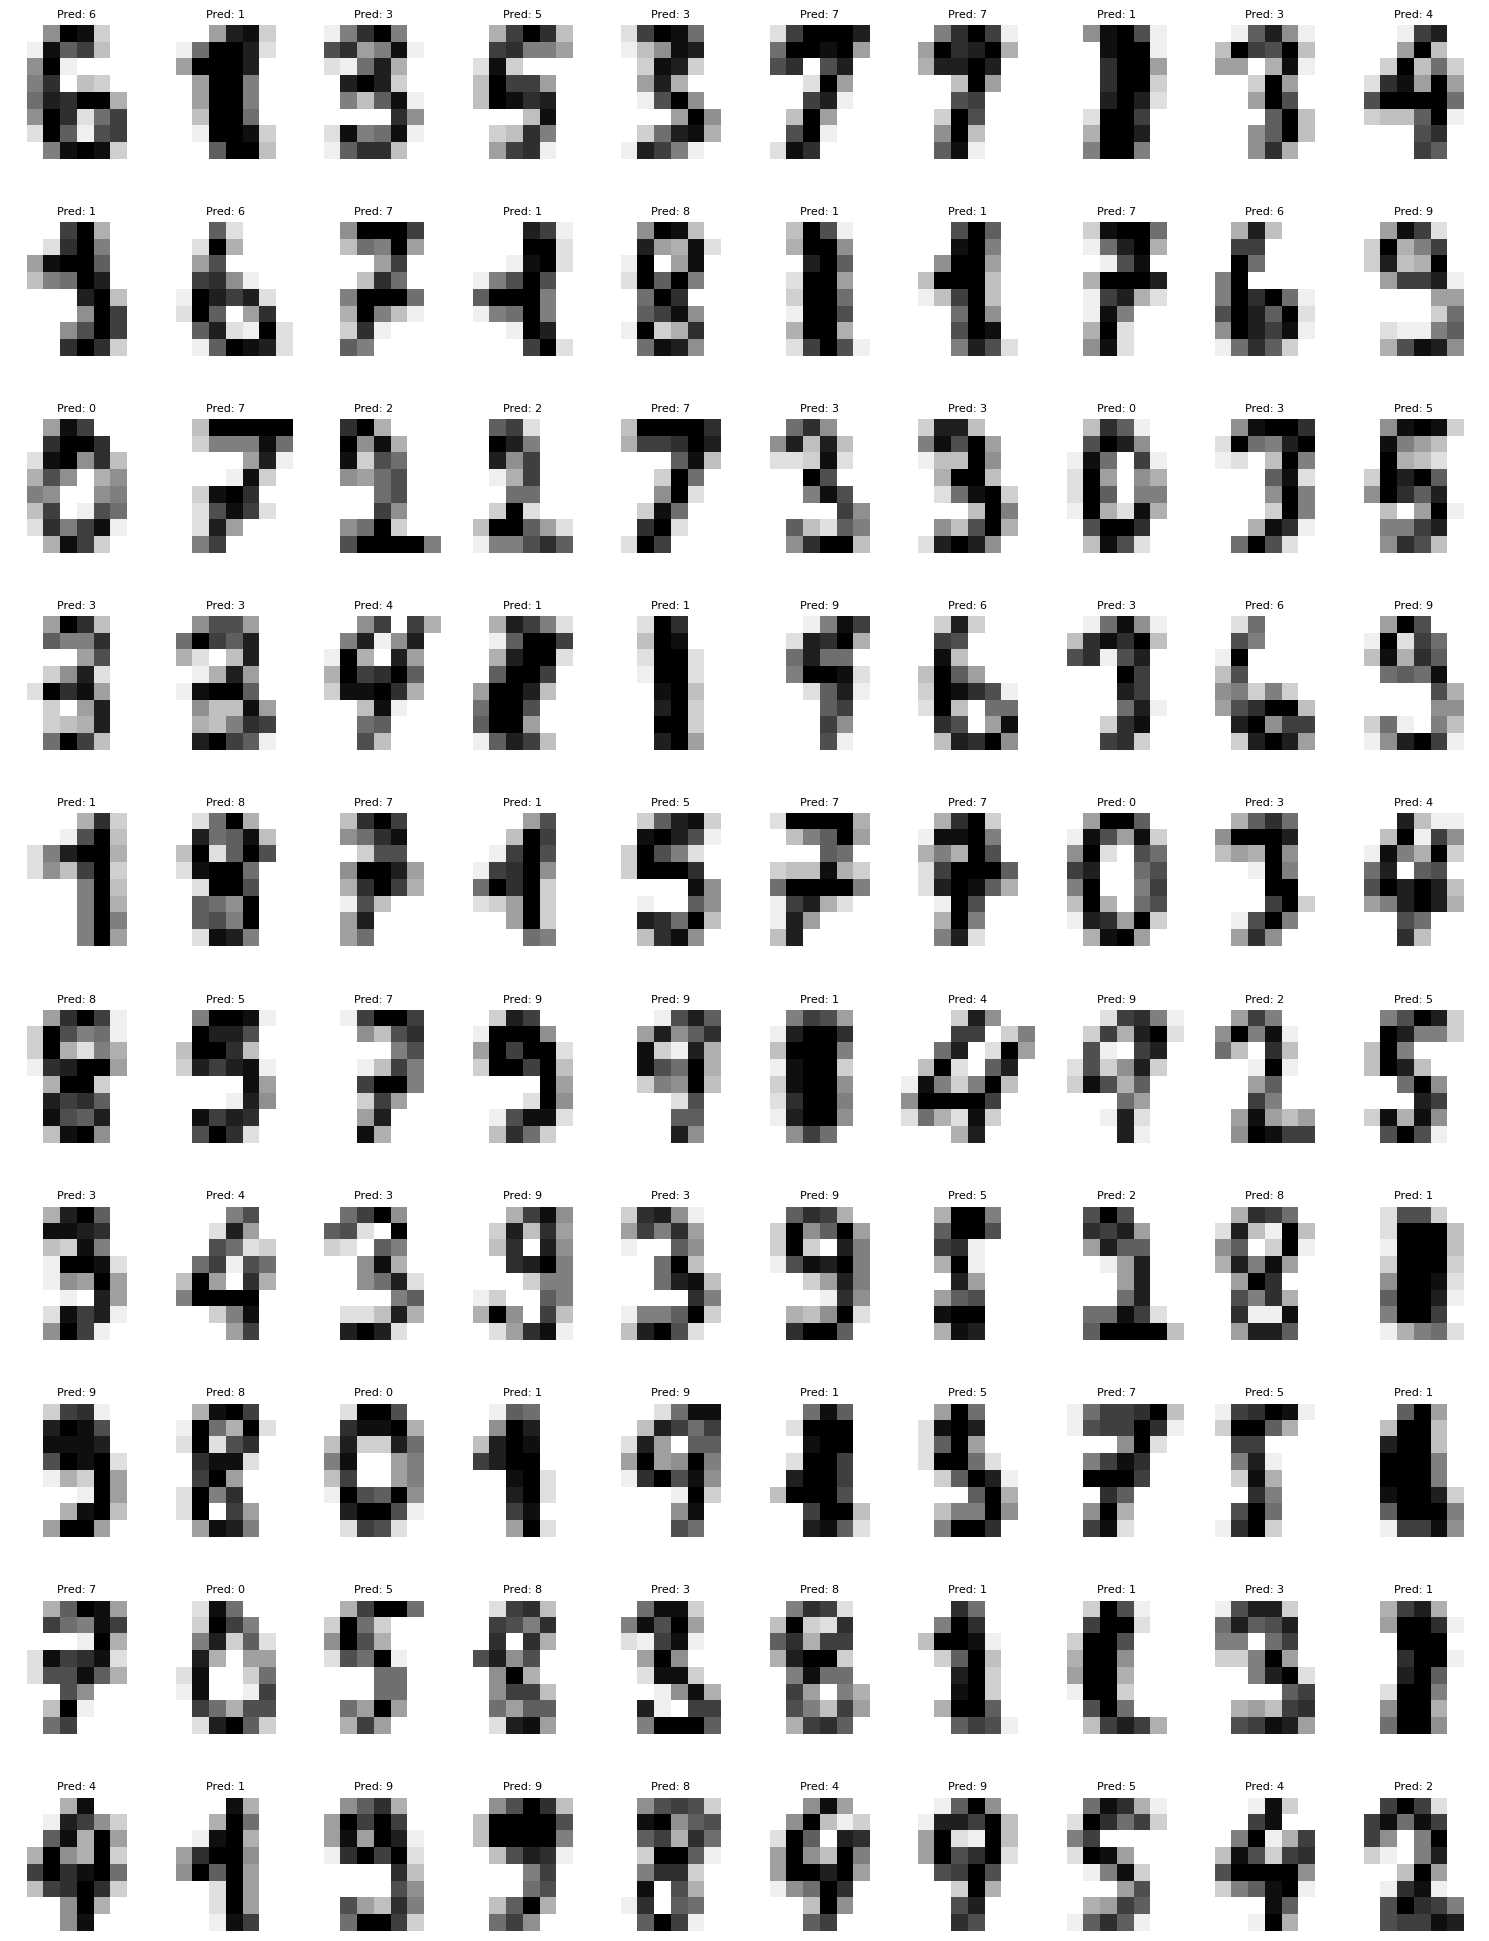

In [4]:
# num_images = len(X_test)
num_images = min(100, len(X_test))
num_cols = 10
num_rows = math.ceil(num_images / num_cols)

plt.figure(figsize=(1.5 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    img_index = i 
    image = X_test.to_numpy()[img_index].reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Pred: {predicted[img_index]}', fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()